In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:\\INNOMATICS INTERN\\major-2\\reviews_data_dump\\reviews_badminton\\data.csv',encoding = 'unicode_escape')

In [3]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust Ã¢?Â¹620 ..from retailer.I did...,1


In [4]:
df.shape

(8518, 8)

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [7]:
df.loc[df['Ratings'].between(1, 2), 'Review Title'] = 'Negative'
df.loc[df['Ratings'].between(3, 5), 'Review Title'] = 'Positive'

In [8]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Positive,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Negative,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Negative,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Positive,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Negative,NaN,147.0,24.0,Apr 2016,Over pricedJust Ã¢?Â¹620 ..from retailer.I did...,1


In [9]:
df.dropna(inplace = True)

In [10]:
df.loc[df['Review Title']=='Positive', 'Review label'] = 0
df.loc[df['Review Title']=='Negative', 'Review label'] = 1

In [11]:
df = df[['Review text', 'Review Title', 'Review label']]

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.head()

,Review text,Review Title,Review label
0,"Nice product, good quality, but price is now r...",Positive,0.0
1,They didn't supplied Yonex Mavis 350. Outside ...,Negative,1.0
2,Worst product. Damaged shuttlecocks packed in ...,Negative,1.0
5,Good quality product. Delivered on time.READ MORE,Positive,0.0
6,BEST PURCHASE It is a good quality and is more...,Positive,0.0


In [14]:
X = df.iloc[:,-3]
Y = df.iloc[:,-1]

In [15]:
X.head()

0    Nice product, good quality, but price is now r...
1    They didn't supplied Yonex Mavis 350. Outside ...
2    Worst product. Damaged shuttlecocks packed in ...
5    Good quality product. Delivered on time.READ MORE
6    BEST PURCHASE It is a good quality and is more...
Name: Review text, dtype: object

In [16]:
Y.head()

0    0.0
1    1.0
2    1.0
5    0.0
6    0.0
Name: Review label, dtype: float64

In [17]:
Y.value_counts()

0.0    3937
1.0     849
Name: Review label, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state=42, shuffle = True )

In [19]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

In [20]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [21]:
def preprocess(raw_text):
    if isinstance(raw_text, str):
        sentence = re.sub("[^a-zA-Z]", " ", raw_text)  
        #sentence = re.sub(r'[^\w\s\n]', " ", sentence)  
        #sentence = re.sub(r'\b\d+\b', ' ', sentence)
        sentence = "".join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
        sentence = sentence.lower()
        tokens = nltk.word_tokenize(sentence)
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
        return " ".join(filtered_tokens)

#x_train_lemm = x_train.apply(lambda x: preprocess(x, 'lemm'))

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(preprocessor=preprocess)
X_train_dtm = vect.fit_transform(x_train)
print(X_train_dtm.shape)

(3350, 2378)


In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_dtm, y_train)

In [24]:
X_test_dtm = vect.transform(x_test)
print(X_test_dtm.shape)

(1436, 2378)


In [25]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [26]:
from sklearn import metrics
y_train_pred = nb.predict(X_train_resampled)
metrics.accuracy_score(y_train_resampled, y_train_pred)

0.8433188090050835

In [27]:
metrics.confusion_matrix(y_train_resampled, y_train_pred)

array([[2442,  312],
       [ 551, 2203]], dtype=int64)

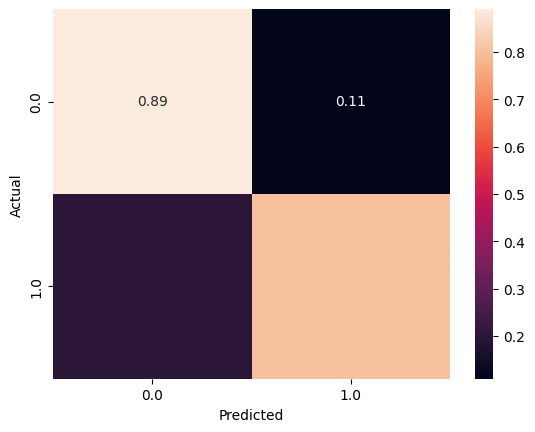

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming cm is your confusion matrix, nb is your Naive Bayes classifier, and y_train_pred is your predicted labels
cm = metrics.confusion_matrix(y_train_resampled, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm / actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
y_test_pred = nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_test_pred)

0.8279944289693594

Text(0.5, 23.52222222222222, 'Predicted')

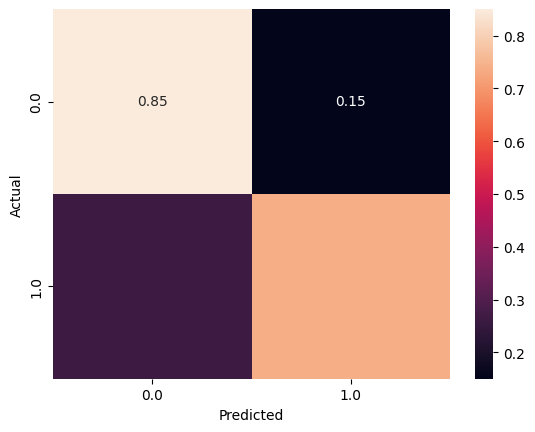

In [30]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [31]:
print("Train Score (F1 Score):", metrics.f1_score(y_train_resampled, y_train_pred))
print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.8362118048965648
Test Score (F1 Score): 0.6009693053311793


In [32]:
import joblib
from joblib import Memory

In [33]:
import joblib
from sklearn import metrics

y_test_pred = nb.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_test_pred)
joblib.dump((y_test_pred, accuracy), 'predictions_and_accuracy.pkl')
print("Predictions and accuracy score saved as 'predictions_and_accuracy.pkl'")

Predictions and accuracy score saved as 'predictions_and_accuracy.pkl'


In [44]:
file_path = 'model.joblib'
model = joblib.dump(nb, file_path)
print(model)

['model.joblib']


*******

In [ ]:
new_df = df.copy()

In [ ]:
new_df.head()

In [ ]:
new_df = df[['Review text', 'Review label']]
X = new_df.iloc[:,-2]
Y = new_df.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state=42, shuffle = True )

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.head()

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
x_train.head()

In [ ]:
def preprocess(raw_text, flag):
    if isinstance(raw_text, str):
        sentence = re.sub("[^a-zA-Z]", " ", raw_text)  
        sentence = re.sub(r'[^\w\s\n]', " ", sentence)  
        sentence = re.sub(r'\b\d+\b', ' ', sentence)  
        sentence = sentence.lower()
        tokens = sentence.split()
        clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
        if flag == 'stem':
            stemmer = PorterStemmer()
            clean_tokens = [stemmer.stem(word) for word in clean_tokens]
        else:
            lemmatizer = WordNetLemmatizer()
            clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

        return pd.Series([" ".join(clean_tokens)])
    else:
        return pd.Series([""])

x_train_stem = x_train.apply(lambda x: preprocess(x, 'stem'))

In [ ]:
x_train_lemm = x_train.apply(lambda x: preprocess(x, 'lemm'))

In [ ]:
X_train = pd.concat([x_train, x_train_stem, x_train_lemm], axis=0)

In [ ]:
X_train.head()

In [ ]:
x_train_stem.columns = ['Review text_stem']

In [ ]:
x_train_lemm.columns = ['Review text_lemma']

In [ ]:
x_train_lemm.head()

In [ ]:
x_train_stem.head()

negative word cloud

In [ ]:
negative_word = x_train_lemm.loc[(y_train<2),:]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(negative_word['Review text_lemma'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

positive words

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
import gensim
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np

In [ ]:
model1 = gensim.models.Word2Vec(x_train_lemm['Review text_lemma'], min_count=1,
                                vector_size=200, window=7)

In [ ]:
import numpy as np

def document_vector(doc, keyed_vectors):
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    if len(vocab_tokens) == 0:
        return np.zeros(keyed_vectors.vector_size)
    return np.mean(keyed_vectors[vocab_tokens], axis=0)

doc_vector = x_train_lemm['Review text_lemma'].apply(lambda x: document_vector(x, model1.wv))

In [ ]:
X_train = pd.concat([x_train,x_train_lemm,doc_vector], axis = 1)

In [ ]:
X_train.columns = ['Review_text', 'text_lemma', 'vector_lemma']

In [ ]:
X_train.head()

# test preprocessing

In [ ]:
x_test.head()

In [ ]:
x_test_lemm = x_test.apply(lambda x: preprocess(x, 'lemm'))

In [ ]:
x_test_lemm.head()

In [ ]:
x_test_lemm[0]

In [ ]:
X_test = pd.concat([x_test,x_test_lemm,doc_vector], axis = 1)

In [ ]:
doc_vector = x_test_lemm[0].apply(lambda x: document_vector(x, model1.wv))

In [ ]:
doc_vector

In [ ]:
X_test = pd.concat([x_test,x_test_lemm,doc_vector], axis = 1)

In [ ]:
X_test.columns = ['Review text', 'text_lem', 'vector_lemm']

In [ ]:
X_test.head()

In [ ]:
x_test_vector = list(X_test['vector_lemm'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train_vectors = list(X_train['vector_lemma'])
classifier = LogisticRegression()
classifier.fit(X_train_vectors, y_train)

In [ ]:
y_train_pred = classifier.predict(X_train_vectors)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_train, y_train_pred))

print(classification_report(y_train, y_train_pred))

In [ ]:
y_test_pred = classifier.predict(x_test_vector)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train_vectors,y_train)
y_train_pred = knn_classifier.predict(X_train_vectors)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_train, y_train_pred))

print(classification_report(y_train, y_train_pred))

In [ ]:
y_test_pred = knn_classifier.predict(x_test_vector)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectors, y_train)

In [ ]:
y_train_pred = rf_classifier.predict(X_train_vectors)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_train, y_train_pred))

print(classification_report(y_train, y_train_pred))

In [ ]:
y_test_pred = knn_classifier.predict(x_test_vector)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))